In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *

from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath
import uncertainties


In [3]:
Temperatures=pd.read_csv("Measure_data.csv")
Electric_energy=pd.read_csv("Pressure_data_40min.csv")

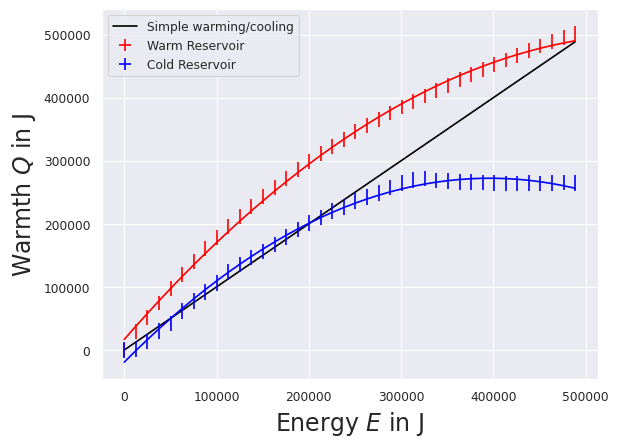

In [97]:
mass_red=4.28-0.32 #kg
mass_blue=4.52-0.34 #kg
mass_uncert=np.sqrt(2*0.01**2) #kg
temps_hot=[]
for i in range(40):
    temps_hot.append(abs(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0])*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0])*mass_blue*4182)
temps_cold=np.array(temps_cold)

#for both temperatures
temp_err=np.sqrt(2*0.5**2)
temps_hot_uncert=np.sqrt((temp_err*mass_red*4182)**2) #+ (temps_hot*mass_uncert*4182)**2)
temps_cold_uncert=np.sqrt((temp_err*mass_blue*4182)**2) #+ (temps_cold*mass_uncert*4182)**2)


energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()

energies=np.linspace(0, all_energy, 40)
energies_uncert=np.ones(40)*np.sqrt((0.1*60)**2 + (0.01*60)**2)

sns.set_theme(style="darkgrid")
sns.set_context("paper")
#plt.scatter(energies, temps_hot, marker="+", color="red", label="Warm Reservoir")
#plt.scatter(energies, temps_cold, marker="+", color="blue", label="Cold Reservoir")


def myfunction(x):
  return 1*x 
  #60 because we are actually having to work with the intervalls of 60 seconds

mymodel = list(map(myfunction, energies))
plt.plot(energies, mymodel, label="Simple warming/cooling", color="black")

model_hot = np.poly1d(np.polyfit(energies, temps_hot, 2))
plt.errorbar(energies, temps_hot, yerr=temps_hot_uncert, xerr=energies_uncert, color="red", label="Warm Reservoir", fmt="None")
plt.plot(energies, model_hot(energies), color="red")

eff_coef_hot=[model_hot(energies[5])/energies[5],
              model_hot(energies[15])/energies[15],
              model_hot(energies[35])/energies[35]]

model_cold = np.poly1d(np.polyfit(energies, temps_cold, 2))
plt.errorbar(energies, temps_cold, yerr=temps_cold_uncert, xerr=energies_uncert, color="blue", label="Cold Reservoir", fmt="None")
plt.plot(energies, model_cold(energies), color="blue")

eff_coef_cold=[model_cold(energies[5])/energies[5],
              model_cold(energies[15])/energies[15],
              model_cold(energies[35])/energies[35]]

#mymodel = list(map(myfunction2, energies))
#plt.plot(energies, mymodel, label="Simple cooling", color="cyan")

plt.xlabel("Energy $E$ in J", size=17)
plt.ylabel("Warmth $Q$ in J", size=17)
plt.legend()
#plt.savefig("Warmth_energy.png", dpi=500, bbox_inches="tight")
plt.show()

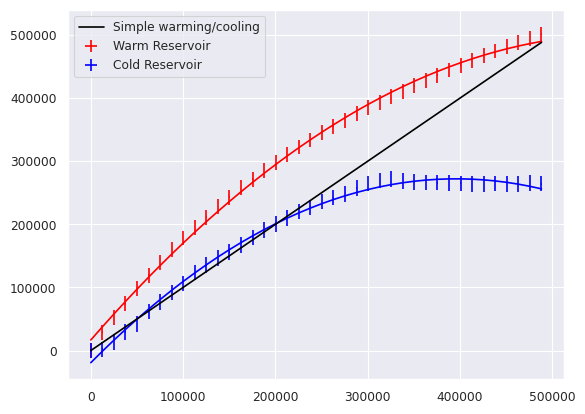

In [5]:
mass_uncert=np.sqrt(2*0.01**2) #kg
mass_red=ufloat(4.28-0.32, mass_uncert) #kg
mass_blue=ufloat(4.52-0.34, mass_uncert) #kg

temps_hot=[]
for i in range(40):
    temps_hot.append(abs(ufloat(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0], np.sqrt(2*0.5**2)))*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(ufloat(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0], np.sqrt(2*0.5**2)))*mass_blue*4182)
temps_cold=np.array(temps_cold)

energies=np.linspace(0, all_energy, 40)
energy_uncert=np.sqrt((0.1*Electric_energy["I(A)"]*60)**2 + (0.01*Electric_energy["U(V)"]*60)**2)

energy_list=[]
for i in range(40):
    energy_list.append(ufloat(energies[i], energy_uncert[i]))
energy_list=np.array(energy_list)

sns.set_theme(style="darkgrid")
sns.set_context("paper")

plt.errorbar([energy_list[i].n for i in range(40)], [temps_hot[i].n for i in range(40)],
            yerr=[temps_hot[i].s for i in range(40)], xerr=[energy_list[i].s for i in range(40)],
            color="red", label="Warm Reservoir", fmt="None")
model_hot = np.poly1d(np.polyfit(energies, [temps_hot[i].n for i in range(40)], 2))
plt.plot(energies, model_hot(energies), color="red")

plt.errorbar([energy_list[i].n for i in range(40)], [temps_cold[i].n for i in range(40)],
            yerr=[temps_cold[i].s for i in range(40)], xerr=[energy_list[i].s for i in range(40)],
            color="blue", label="Cold Reservoir", fmt="None")
model_cold = np.poly1d(np.polyfit(energies, [temps_cold[i].n for i in range(40)], 2))
plt.plot(energies, model_cold(energies), color="blue")


mymodel = list(map(myfunction, energies))
plt.plot(energies, mymodel, label="Simple warming/cooling", color="black")
plt.legend()
plt.show()

eff_coef_hot=[ufloat(model_hot(energies[5])/energies[5], 0.002*model_hot(energies[5])/energies[5]),
              ufloat(model_hot(energies[15])/energies[15], 0.002*model_hot(energies[15])/energies[15]),
              ufloat(model_hot(energies[35])/energies[35], 0.002*model_hot(energies[35])/energies[35])]


eff_coef_cold=[ufloat(model_cold(energies[5])/energies[5], 0.005*model_cold(energies[5])/energies[5]),
              ufloat(model_cold(energies[15])/energies[15], 0.005*model_cold(energies[15])/energies[15]),
              ufloat(model_cold(energies[35])/energies[35], 0.005*model_cold(energies[35])/energies[35])]


EX2 finding the effitiency coefficient through the Polynomial of 2. grade, already done in the previous excercise, with help of a polynomial fit - we simply found the rate of growth of a function at 5, 15, 35 minutes and use that as our 

In [6]:
eff_coef_hot

[1.8566715558774796+/-0.003713343111754959,
 1.4957373745353588+/-0.002991474749070718,
 1.0800705724147943+/-0.0021601411448295884]

In [7]:
eff_coef_cold

[1.048797960014541+/-0.005243989800072705,
 1.0205672780834654+/-0.005102836390417327,
 0.6133358686822442+/-0.003066679343411221]

In [8]:
from sklearn.metrics import r2_score
print(r2_score([temps_hot[i].n for i in range(40)], model_hot(energies)))
print(r2_score([temps_cold[i].n for i in range(40)], model_cold(energies)))


ModuleNotFoundError: No module named 'sklearn'

Those results prove a very good fit, even though our data has a substantial difference in comparisson to expected values.

In [9]:
Array_1=np.array([Temperatures["CHANNEL1"][60*5], Temperatures["CHANNEL1"][15*60],
                    Temperatures["CHANNEL1"][60*35]])+273.15
Array_5=np.array([Temperatures["CHANNEL5"][60*5], Temperatures["CHANNEL5"][15*60],
                    Temperatures["CHANNEL5"][60*35]])+273.15
Array_0=np.array([Temperatures["CHANNEL0"][60*5], Temperatures["CHANNEL0"][15*60],
                    Temperatures["CHANNEL0"][60*35]])+273.15
Array_3=np.array([Temperatures["CHANNEL3"][60*5], Temperatures["CHANNEL3"][15*60],
                    Temperatures["CHANNEL3"][60*35]])+273.15
Array_2=np.array([Temperatures["CHANNEL2"][60*5], Temperatures["CHANNEL2"][15*60],
                    Temperatures["CHANNEL2"][60*35]])+273.15
Array_4=np.array([Temperatures["CHANNEL4"][60*5], Temperatures["CHANNEL4"][15*60],
                    Temperatures["CHANNEL4"][60*35]])+273.15
Array_6=np.array([Temperatures["CHANNEL6"][60*5], Temperatures["CHANNEL6"][15*60],
                    Temperatures["CHANNEL6"][60*35]])+273.15
Array_7=np.array([Temperatures["CHANNEL7"][60*5], Temperatures["CHANNEL7"][15*60],
                    Temperatures["CHANNEL7"][60*35]])+273.15
print(str(Array_0) +":0\n" + str(Array_3) +":3\n" + str(Array_2)  +":2\n" + str(Array_4)  +":4\n" + str(Array_6) +":6\n" + str(Array_7) + ":7")
print('1', Array_1)
print('5', Array_5)


[304.8396 316.1609 332.902 ]:0
[303.5412 313.2857 326.1611]:3
[299.6605 308.6579 317.9125]:2
[279.9968 273.9823 271.0791]:4
[281.0628 278.3748 271.9817]:6
[283.9611 279.3106 278.5366]:7
1 [299.1078 309.1709 320.5972]
5 [285.0395 277.6472 273.4268]


In [116]:
pressure_2=(np.array([6.6, 8.8, 12])*1E5 + 94872)*1E-6
pressure_4=(np.array([2.95, 2.20, 1.90])*1E5 + 94872)*1E-6
print(str(pressure_2) + "\n" + str(pressure_4)) #Pascal

[0.754872 0.974872 1.294872]
[0.389872 0.314872 0.284872]


In [29]:
#entalpies read off of minirefprop plots, we assume error of 0.1
Enthalpie_3=np.array([ufloat(236.71, 0.1), ufloat(250.11, 0.1), ufloat(263.52, 0.1)]) * 10**3 #J/kg Point 3 for Temperature 2
Enthalpie_1=np.array([ufloat(403.27, 0.1), ufloat(402.33, 0.1), ufloat(398.25, 0.1)]) * 10**3
Enthalpie_2=np.array([ufloat(416.04, 0.1), ufloat(420.27, 0.1), ufloat(427.32, 0.1)]) * 10**3
Enthalpie_4=Enthalpie_3

In [30]:
#calculate CR performance factors
E_CR = (Enthalpie_2 - Enthalpie_3) / (Enthalpie_2 - Enthalpie_1)
E_CR_ = (Enthalpie_1 - Enthalpie_4) / (Enthalpie_2 - Enthalpie_1)

print('E_CR:', E_CR)
print('E_CR`:', E_CR_)



E_CR: [14.043069694596712+/-0.15028904987362698
 9.48494983277592+/-0.07115677660762731
 5.634674922600619+/-0.025332255635839056]
E_CR`: [13.043069694596712+/-0.15028904987362698
 8.48494983277592+/-0.07115677660762731
 4.634674922600619+/-0.02533225563583905]


In [98]:
#calculate flow of cooling medium with enthalpy change
heat_flow = np.array([temps_hot[5]/(5*60), temps_hot[15]/(15*60), temps_hot[35] /(35*60)])
cold_flow = np.array([temps_cold[5]/(5*60), temps_cold[15]/(15*60), temps_cold[35] /(35*60)])
medium_flow_hot = heat_flow / (Enthalpie_2 - Enthalpie_3) #medium flow in kg/s
medium_flow_cold = cold_flow / (Enthalpie_1 - Enthalpie_4) #medium flow in kg/s

flow = (np.average(medium_flow_hot) + np.average(medium_flow_cold)) / 2



m_f_h = np.array([medium_flow_hot[0].n, medium_flow_hot[1].n, medium_flow_hot[2].n])
m_f_c = np.array([medium_flow_cold[0].n, medium_flow_cold[1].n, medium_flow_cold[2].n])

s1 = sqrt(((flow-m_f_h[0])**2 + (flow-m_f_h[1])**2 + (flow-m_f_h[2])**2)/3) 
s2 = sqrt(((flow-m_f_c[0])**2 + (flow-m_f_c[1])**2 + (m_f_c[2]-flow)**2)/3)
flow_error = (s1 + s2) /2
f = ufloat(flow.n, flow_error.n)
print(m_f_h, m_f_c)
print(f) # average medium flow in kg/s

[0.00221336 0.00186575 0.00138077] [0.00123479 0.00139362 0.00093555]
0.0015+/-0.0004


In [103]:
pk = 130 #J/s #power output of compressor
dH = Enthalpie_2 - Enthalpie_1 #enthalpy change with compression
diffh = f*dH/pk #power efficiency for all 3 positions
diffh

array([0.1477365340361283+/-0.04098923396758752,
       0.20754842761222725+/-0.05756130130606255,
       0.33631174975961237+/-0.09324907851647801], dtype=object)

In [120]:
#estimate energy loss/ input from environment
#relative pressures of medium
p_red = (np.array([ufloat(12.3,0.2), ufloat(12.2,0.2), ufloat(11.8,0.2), ufloat(11.2, 0.2), ufloat(10.6, 0.2), ufloat(10.0, 0.2)])*1E5 + 94872)*1E-6
p_blue = (np.array([ufloat(2.1,0.1), ufloat(2.15,0.1), ufloat(2.2,0.1), ufloat(2.25,0.1), ufloat(2.3,0.1), ufloat(2.4, 0.1)])*1E5 + 94872)*1E-6

pdiff_r = (p_red[0] - p_red[5]) / (60*5)
pdiff_b = (p_blue[0] - p_blue[5]) / (60*5)

tempchange_r = (Array_2[2] - Array_2[1]) / (pressure_2[2] - pressure_2[1]) #temperature change per pressure between 15 and 35 min mark
tempchange_b = (Array_4[1] - Array_4[2]) / (pressure_4[1] - pressure_4[2]) #temperature change per pressure between 15 and 35 min mark

tdiff_r = -tempchange_r * pdiff_r #temperature change per second
tdiff_b = -tempchange_b * pdiff_b #tepmerature change per second

ef_r = tdiff_r*mass_red*4182 # net outflow into surrounding
ef_b = tdiff_b*mass_red*4182 # net inflow from surrounding

print(tdiff_r, tdiff_b)
print(ef_r, ef_b)


-0.0222+/-0.0027 0.010+/-0.005
(-3.7+/-0.5)e+02 (1.6+/-0.8)e+02


In [ ]:
t = np.array([1,2,3,4,5,6])
plt.scatter(t, [p_blue[i].n for i in range(len(p_blue))], label = 'pressure cold')
plt.ylabel('Relative pressure / bar')
plt.xlabel('Timestep / min')

Text(0.5, 0, 'Timestep / min')

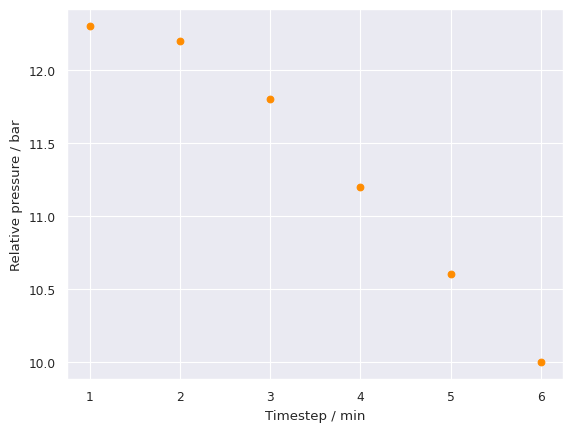

In [113]:
plt.scatter(t, [p_red[i].n for i in range(len(p_red))], color = 'darkorange', label = 'pressure warm')
plt.ylabel('Relative pressure / bar')
plt.xlabel('Timestep / min')